In [1]:
import sys
import os
curr_dir = os.getcwd()
if 's94zalek_hpc' in curr_dir:
    user_name = 's94zalek_hpc'
else:
    user_name = 's94zalek'
sys.path.append(f'/home/{user_name}/shape_matching')

import my_code.datasets.template_dataset as template_dataset
import datasets_code.shape_dataset as shape_dataset

from my_code.datasets.surreal_dataset_3dc import TemplateSurrealDataset3DC

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset_faust_single = shape_dataset.SingleFaustDataset(
        data_root='data/FAUST_original',
        phase='train',
        return_faces=True,
        return_evecs=False, num_evecs=32,
        return_corr=True, return_dist=False
    )
    
dataset_faust = template_dataset.TemplateDataset(
    base_dataset=dataset_faust_single,
    num_evecs=32,
    cache_lb_dir='/home/s94zalek_hpc/shape_matching/data/FAUST_scaled/original_32',
    return_Cxy=False
)

Loading base dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:01<00:00, 62.59it/s]


In [3]:
dataset_faust_single_remeshed = shape_dataset.SingleFaustDataset(
        data_root='data/FAUST_r',
        phase='train',
        return_faces=True,
        return_evecs=False, num_evecs=32,
        return_corr=True, return_dist=False
    )

dataset_faust_remeshed = template_dataset.TemplateDataset(
    base_dataset=dataset_faust_single_remeshed,
    num_evecs=32,
    cache_lb_dir='/home/s94zalek_hpc/shape_matching/data/FAUST_scaled/remeshed_32',
    return_Cxy=False
)

Loading base dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 81.19it/s]


In [4]:
dir_3dc = '/home/s94zalek_hpc/shape_matching/data/SURREAL_full/full_datasets/dataset_3dc_32/test'

dataset_3dc = TemplateSurrealDataset3DC(
    shape_path=f'/home/{user_name}/3D-CODED/data/datas_surreal_test.pth',
    num_evecs=32,
    use_cuda=False,
    cache_lb_dir=dir_3dc
)  

In [6]:
from tqdm import tqdm

# for i in tqdm(range(len(dataset_3dc))):
#     dataset_3dc[i]
    
# for i in tqdm(range(len(dataset_faust))):
#     dataset_faust[i]
    
for i in tqdm(range(len(dataset_faust_remeshed))):
    dataset_faust_remeshed[i]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:40<00:00,  1.99it/s]


-------------------
-------------------
-------------------


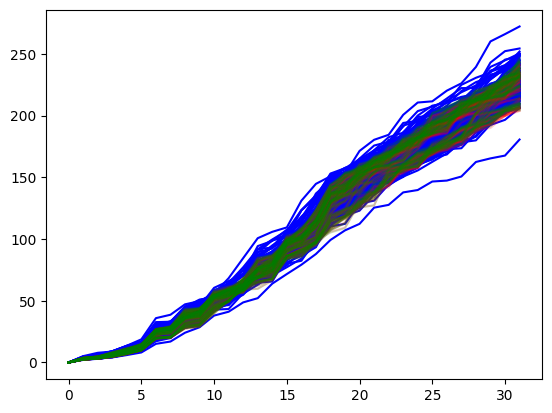

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# n_evals = 3

# random_idx_faust = np.random.randint(0, len(dataset_faust), n_evals)
# random_idx_3dc = np.random.randint(0, len(dataset_3dc), n_evals)

for i in range(len(dataset_3dc)):
    data_3dc = dataset_3dc[i]
    plt.plot(data_3dc['second']['evals'][0], color='blue')
    
print('-------------------')

for i in range(len(dataset_faust)):
    data_faust = dataset_faust[i]
    plt.plot(data_faust['second']['evals'][0], color='red', alpha=0.2)
    
print('-------------------')
    
for i in range(len(dataset_faust_remeshed)):
    data_faust_remeshed = dataset_faust_remeshed[i]
    plt.plot(data_faust_remeshed['second']['evals'][0], color='green', alpha=0.2)
    
print('-------------------')

plt.show()



In [7]:
import trimesh

# plot 5 shapes from FAUST and 5 shapes from 3DC
scene = trimesh.Scene()

n_shapes = 5

random_idx_faust = np.random.randint(0, len(dataset_faust), n_shapes)

for i, idx in enumerate(random_idx_faust):
    data_faust = dataset_faust[idx]
    mesh = trimesh.Trimesh(vertices=data_faust['second']['verts'] + np.array([i, 0, 0]), faces=data_faust['second']['faces'])
    scene.add_geometry(mesh)
    
random_idx_3dc = np.random.randint(0, len(dataset_3dc), n_shapes)

for i, idx in enumerate(random_idx_3dc):
    data_3dc = dataset_3dc[idx]
    mesh = trimesh.Trimesh(vertices=data_3dc['second']['verts'] + np.array([i, -1, 0]), faces=data_3dc['second']['faces'])
    scene.add_geometry(mesh)
    
mesh_template = trimesh.Trimesh(vertices=data_faust['first']['verts'] + np.array([-1, 0, 0]), faces=data_faust['first']['faces'])
scene.add_geometry(mesh_template)

mesh_template = trimesh.Trimesh(vertices=data_3dc['first']['verts'] + np.array([-1, -1, 0]), faces=data_3dc['first']['faces'])
scene.add_geometry(mesh_template)

scene.show()


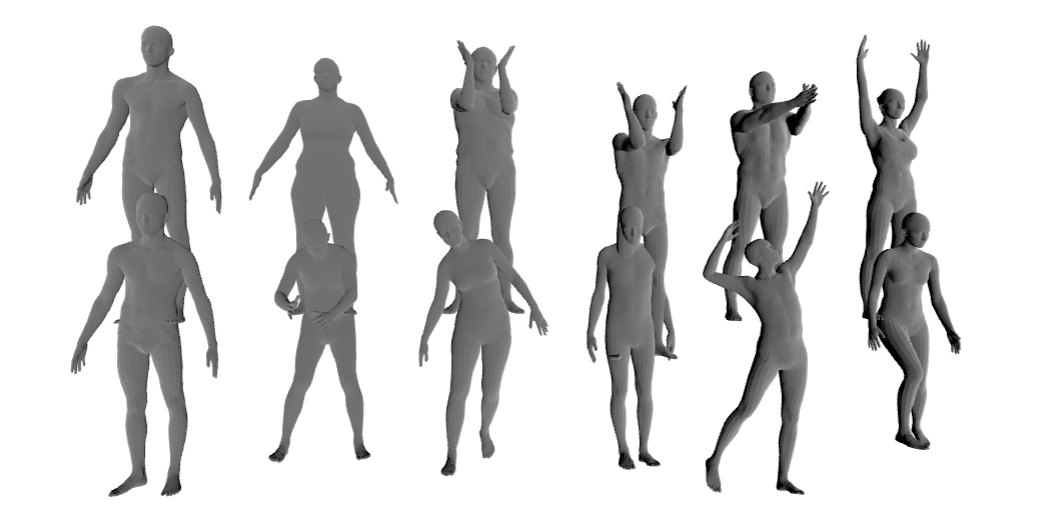